Exploratary Data Analysis for solar Data discovery country Benin 

* Timestamp (yyyy-mm-dd hh:mm): Date and time of each observation.
* GHI (W/m²): Global Horizontal Irradiance, the total solar radiation received per square meter on a horizontal surface.
* DNI (W/m²): Direct Normal Irradiance, the amount of solar radiation received per square meter on a surface perpendicular to the rays of the sun.
* DHI (W/m²): Diffuse Horizontal Irradiance, solar radiation received per square meter on a horizontal surface that does not arrive on a direct path from the sun.
* ModA (W/m²): Measurements from a module or sensor (A), similar to irradiance.
* ModB (W/m²): Measurements from a module or sensor (B), similar to irradiance.
* Tamb (°C): Ambient Temperature in degrees Celsius.
* RH (%): Relative Humidity as a percentage of moisture in the air.
* WS (m/s): Wind Speed in meters per second.
* WSgust (m/s): Maximum Wind Gust Speed in meters per second.
* Sstdev (m/s): Standard Deviation of Wind Speed, indicating variability.
* WD (°N (to east)): Wind Direction in degrees from north.
* WDstdev: Standard Deviation of Wind Direction, showing directional variability.
* BP (hPa): Barometric Pressure in hectopascals.
* Cleaning (1 or 0): Signifying whether cleaning (possibly of the modules or sensors) occurred.
* Precipitation (mm/min): Precipitation rate measured in millimeters per minute.
* TModA (°C): Temperature of Module A in degrees Celsius.
* TModB (°C): Temperature of Module B in degrees Celsius.

In [2]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv(r"E:\solar-challenge-week1\solar-challenge-week1\data\sierraleone-bumbuna.csv")#load the dataset
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [24]:
df.shape # how many row and column

(525600, 19)

In [25]:
df.describe() #TO show summary statsics mean,median,mod,sd,min and max

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [7]:
df.info()#Data type check each column

<class 'pandas.core.frame.DataFrame'>
Index: 525600 entries, 2021-10-30 00:01 to 2022-10-30 00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64
 17  Comments 

In [26]:
df.isnull().any() #find missing values

Timestamp        False
GHI              False
DNI              False
DHI              False
ModA             False
ModB             False
Tamb             False
RH               False
WS               False
WSgust           False
WSstdev          False
WD               False
WDstdev          False
BP               False
Cleaning         False
Precipitation    False
TModA            False
TModB            False
Comments          True
dtype: bool

In [16]:
df.isna().sum() #count and sum null values

GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [27]:
from  scipy import stats  

In [28]:
print(df.shape)

(525600, 19)


In [29]:
print(len(df))

525600


finding Z-scores for GHI, DNI, DHI, ModA, ModB, WS,WSgust

In [33]:
cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"] # select the column to find outliers

z_score = np.abs(stats.zscore(df[cols],nan_policy="omit"))
outlier_mask  = (z_score > 3)
outlier_flags = pd.DataFrame(outlier_mask ,columns = [f"{col}_outlier" for col in cols])
df_with_outliers = pd.concat([df, outlier_flags ], axis=1)

df_outlier = df_with_outliers[outlier_mask.any(axis=1)]
print(df_outlier)



               Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
653     2021-10-30 10:54  814.0  257.0  594.3  878.0  856.0  25.9  85.3  0.5   
654     2021-10-30 10:55  826.0  263.5  599.6  883.0  861.0  26.0  85.4  1.7   
655     2021-10-30 10:56  851.0  285.0  605.9  912.0  890.0  26.0  84.2  1.6   
656     2021-10-30 10:57  823.0  254.8  603.9  878.0  856.0  26.0  85.3  0.8   
657     2021-10-30 10:58  810.0  244.5  598.8  864.0  843.0  26.1  85.7  0.6   
...                  ...    ...    ...    ...    ...    ...   ...   ...  ...   
522184  2022-10-27 15:05  167.2   -0.5  165.1  167.6  160.9  30.4  68.3  5.3   
522185  2022-10-27 15:06  163.4   -0.6  161.0  165.7  159.2  30.2  67.7  7.1   
522194  2022-10-27 15:15  183.5    0.3  181.6  173.7  168.7  29.3  70.2  4.9   
523792  2022-10-28 17:53   31.3   -0.5   30.2   34.3   32.3  28.4  79.5  5.0   
523794  2022-10-28 17:55   22.8   -0.8   21.4   26.5   25.0  27.9  80.4  5.0   

        WSgust  ...  TModA  TModB  Comm

In [34]:
print("original shape:",df.shape)
print("outlier shape:",df_outlier.shape)

original shape: (525600, 19)
outlier shape: (16292, 26)


In [36]:
df_clean = df[(z_score< 3).all(axis=1)]

In [38]:
df_clean.shape

(509308, 19)

In [ ]:
df_clean.to_csv(r"e:\solar-challenge-week1\solar-challenge-week1\data\sierraleone_clean.csv",index = False) # save the cleaned datadf_clean

In [49]:
df_clean = pd.read_csv(r"e:\solar-challenge-week1\solar-challenge-week1\data\sierraleone_clean.csv")
df_clean.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [51]:
df_clean.shape

(509308, 19)

Time Series Analysis

In [52]:
import matplotlib.pyplot as plt

In [54]:
df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"]) # change to datetime 

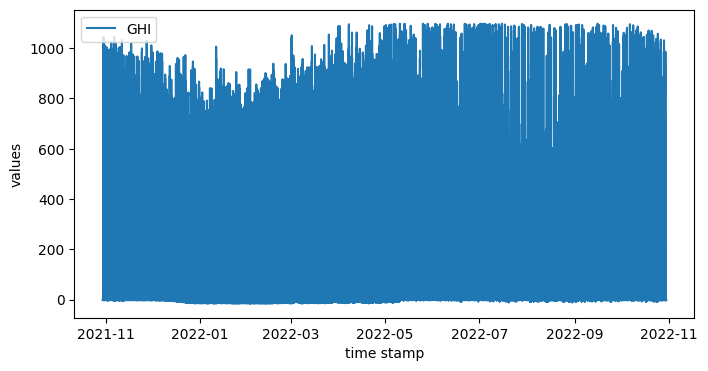

In [55]:
plt.figure(figsize=(8,4))
plt.plot(df_clean["Timestamp"],df_clean["GHI"],label = "GHI")
plt.xlabel("time stamp")
plt.ylabel("values")
plt.legend()
plt.show()

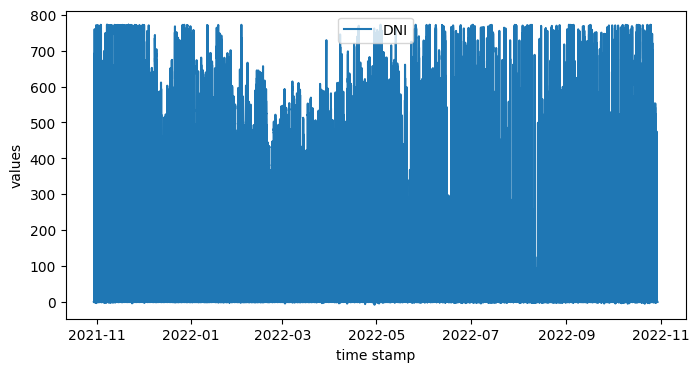

In [56]:
plt.figure(figsize=(8,4))
plt.plot(df_clean["Timestamp"],df_clean["DNI"],label = "DNI")
plt.xlabel("time stamp")
plt.ylabel("values")
plt.legend()
plt.show()

e:\solar-challenge-week1\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


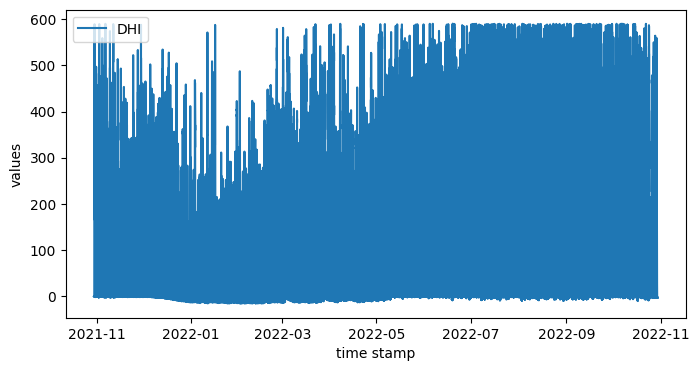

In [57]:
plt.figure(figsize=(8,4))
plt.plot(df_clean["Timestamp"],df_clean["DHI"],label = "DHI")
plt.xlabel("time stamp")
plt.ylabel("values")
plt.legend()
plt.show()

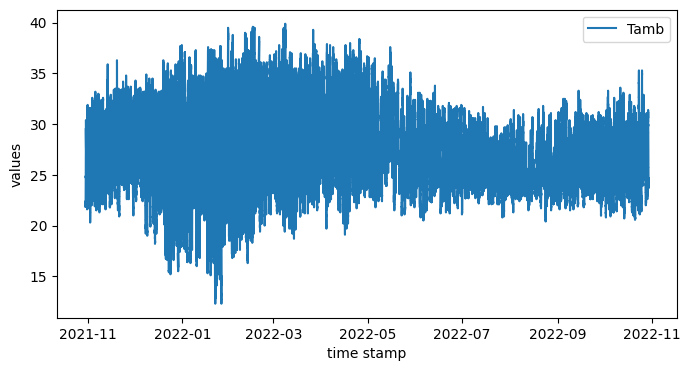

In [59]:
plt.figure(figsize=(8,4))
plt.plot(df_clean["Timestamp"],df_clean["Tamb"],label = "Tamb")
plt.xlabel("time stamp")
plt.ylabel("values")
plt.legend()
plt.show()

In [60]:
df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"]) # change to datetime 
df_clean["Month"] = df_clean["Timestamp"].dt.month # change to a month

monthly_avg_GHI = df_clean.groupby("Month")["GHI"].mean()

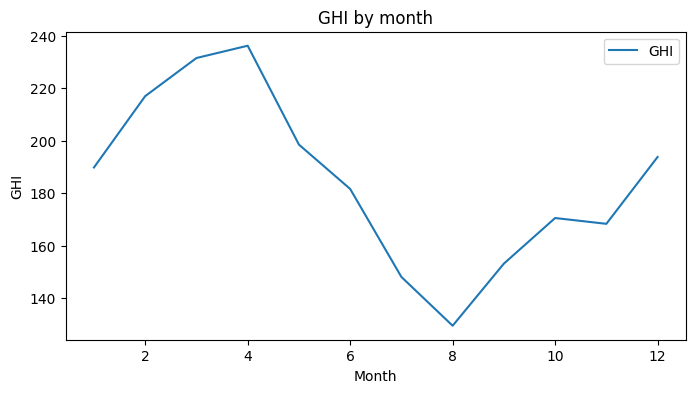

In [61]:
monthly_avg_GHI.plot(figsize=(8,4))
plt.xlabel("Month")
plt.ylabel("GHI")
plt.title("GHI by month")
plt.legend()
plt.show()

In [62]:
monthly_avg_DNI = df_clean.groupby("Month")["DNI"].mean()

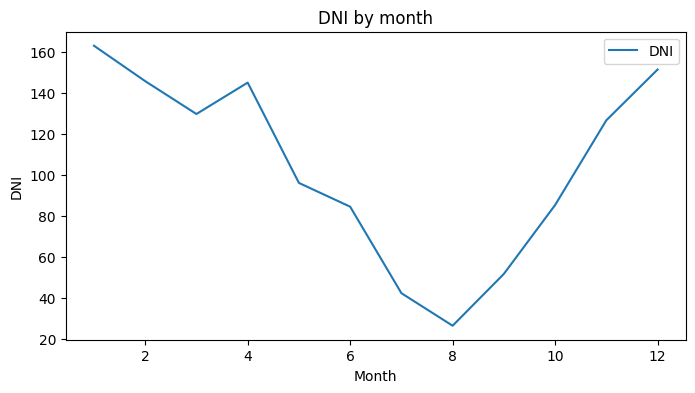

In [63]:
monthly_avg_DNI.plot(figsize=(8,4))
plt.xlabel("Month")
plt.ylabel("DNI")
plt.title("DNI by month")
plt.legend()
plt.show()

In [64]:
monthly_avg_DHI= df_clean.groupby("Month")["DHI"].mean()

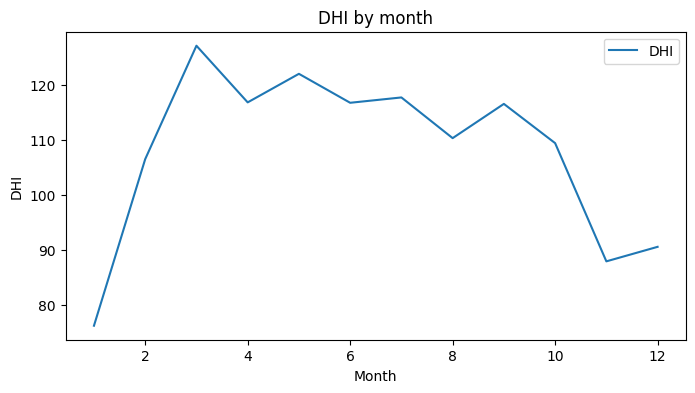

In [65]:
monthly_avg_DHI.plot(figsize=(8,4))
plt.xlabel("Month")
plt.ylabel("DHI")
plt.title("DHI by month")
plt.legend()
plt.show()

In [67]:
monthly_avg_Tamb = df_clean.groupby("Month")["Tamb"].mean()


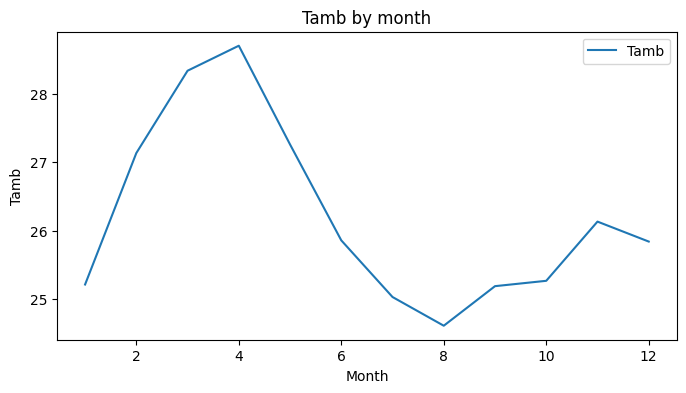

In [68]:
monthly_avg_Tamb.plot(figsize=(8,4))
plt.xlabel("Month")
plt.ylabel("Tamb")
plt.title("Tamb by month")
plt.legend()
plt.show()

Cleaning Impact


In [70]:
average_value = df_clean.groupby("Cleaning")["ModA"].mean()

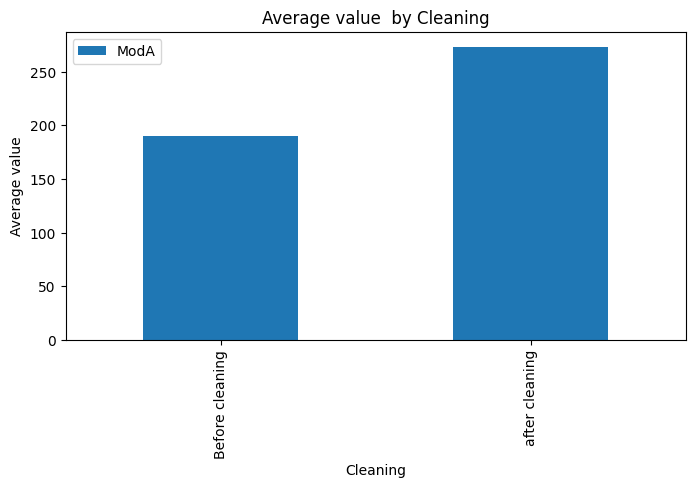

In [71]:
average_value.plot(kind = "bar",figsize=(8,4))
plt.xticks(ticks= [0,1],labels = ["Before cleaning","after cleaning"])
plt.ylabel("Average value")
plt.title("Average value  by Cleaning")
plt.legend()
plt.show()

In [73]:
average_value = df_clean.groupby("Cleaning")["ModB"].mean()

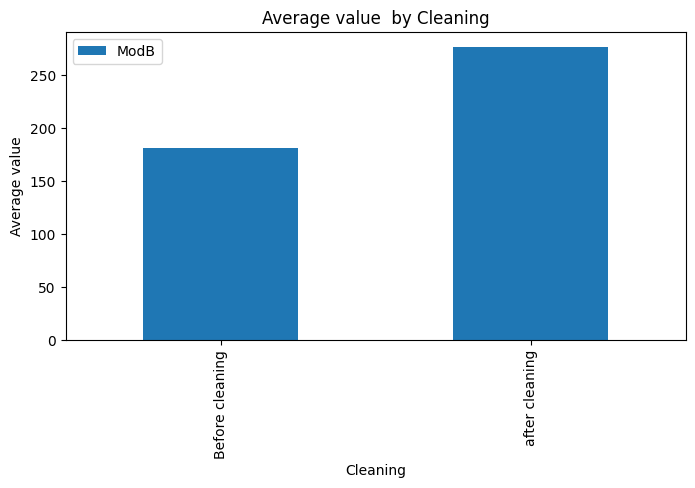

In [74]:
average_value.plot(kind = "bar",figsize=(8,4))
plt.xticks(ticks= [0,1],labels = ["Before cleaning","after cleaning"])
plt.ylabel("Average value")
plt.title("Average value  by Cleaning")
plt.legend()
plt.show()

Correlation & Relationship Analysis

In [79]:
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_clean[cols].corr()

In [78]:
import seaborn as sns

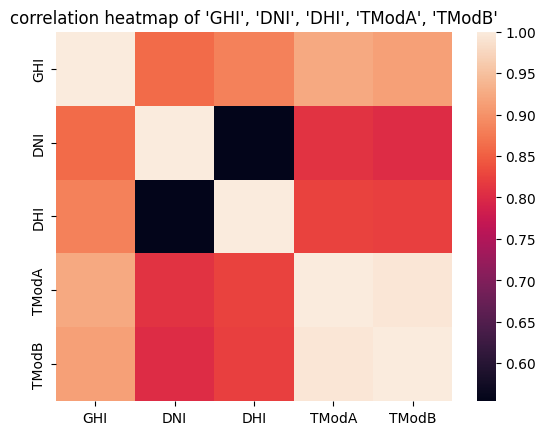

In [80]:
plt.Figure(figsize=(8,4))
sns.heatmap(corr_matrix)
plt.title("correlation heatmap of 'GHI', 'DNI', 'DHI', 'TModA', 'TModB'")
plt.show()

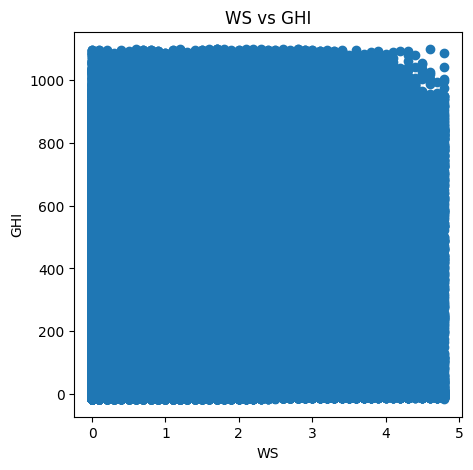

In [81]:
wind_cols = ["WS", "WSgust","WD"]
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(df_clean["WS"], df_clean['GHI'])
plt.xlabel("WS")
plt.ylabel('GHI')
plt.title("WS vs GHI")
plt.show()


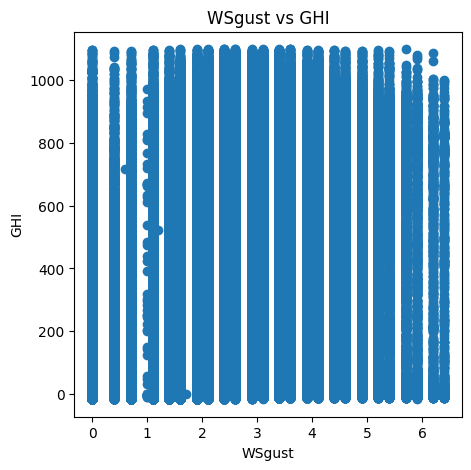

In [82]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(df_clean["WSgust"], df_clean['GHI'])
plt.xlabel("WSgust")
plt.ylabel('GHI')
plt.title("WSgust vs GHI")
plt.show()

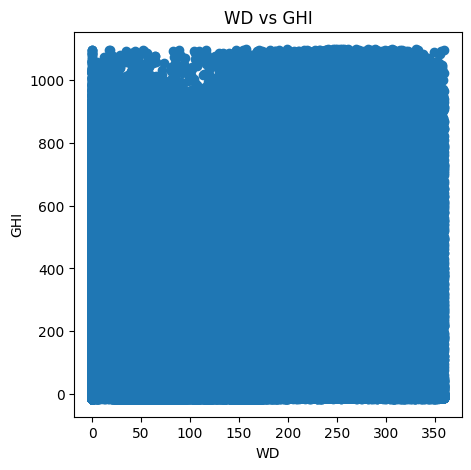

In [83]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(df_clean["WD"], df_clean['GHI'])
plt.xlabel("WD")
plt.ylabel('GHI')
plt.title("WD vs GHI")
plt.show()

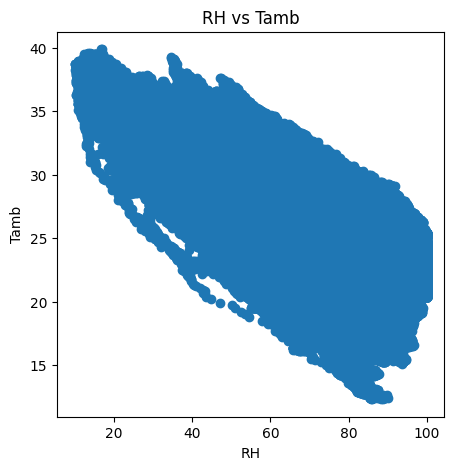

In [84]:

plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(df_clean["RH"], df_clean['Tamb'])
plt.xlabel("RH")
plt.ylabel("Tamb")
plt.title("RH vs Tamb")
plt.show()

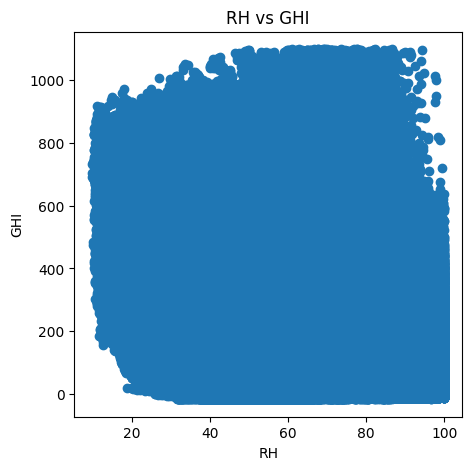

In [86]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(df_clean["RH"], df_clean['GHI'])
plt.xlabel("RH")
plt.ylabel("GHI")
plt.title("RH vs GHI")
plt.show()

Wind & Distribution Analysis

In [87]:
from windrose import WindroseAxes

<Figure size 1000x800 with 0 Axes>

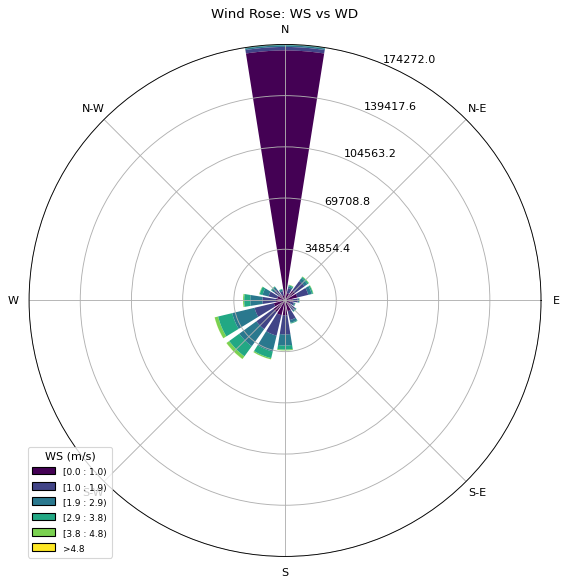

In [88]:
plt.figure(figsize=(10,8))
ax = WindroseAxes.from_ax()
ax.bar(df_clean["WD"],df_clean["WS"])
ax.set_legend(title = "WS (m/s)")
plt.title("Wind Rose: WS vs WD")
plt.show()

Text(0.5, 1.0, 'Histogram of GHI')

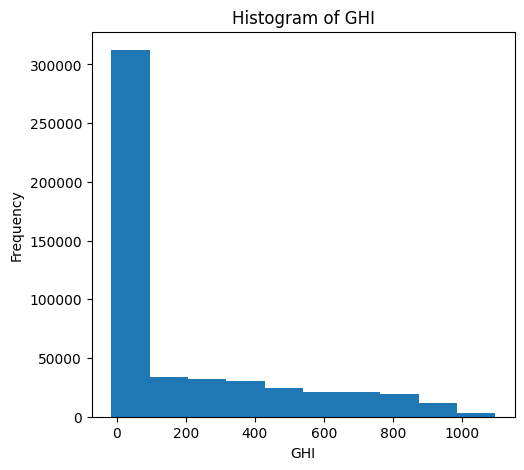

In [89]:
plt.figure(figsize=(12,5)) # Histogram for GHI
plt.subplot(1,2,1)
plt.hist(df_clean['GHI'])
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.title('Histogram of GHI')

Text(0.5, 1.0, 'Histogram of WS')

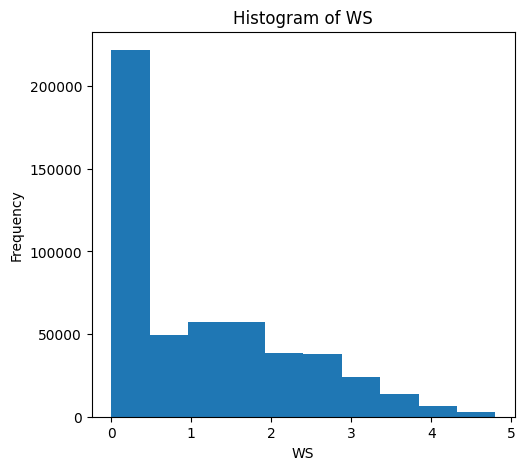

In [90]:
plt.figure(figsize=(12,5)) # Histogram for GHI
plt.subplot(1,2,1)
plt.hist(df_clean['WS'])
plt.xlabel('WS')
plt.ylabel('Frequency')
plt.title('Histogram of WS')

Temperature Analysis

In [94]:
cols = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
corr = df_clean[cols].corr()
print(corr)

            RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.790651 -0.569956 -0.575663 -0.446391
Tamb -0.790651  1.000000  0.649400  0.583991  0.577923
GHI  -0.569956  0.649400  1.000000  0.861422  0.882559
DNI  -0.575663  0.583991  0.861422  1.000000  0.554180
DHI  -0.446391  0.577923  0.882559  0.554180  1.000000


Bubble Chart

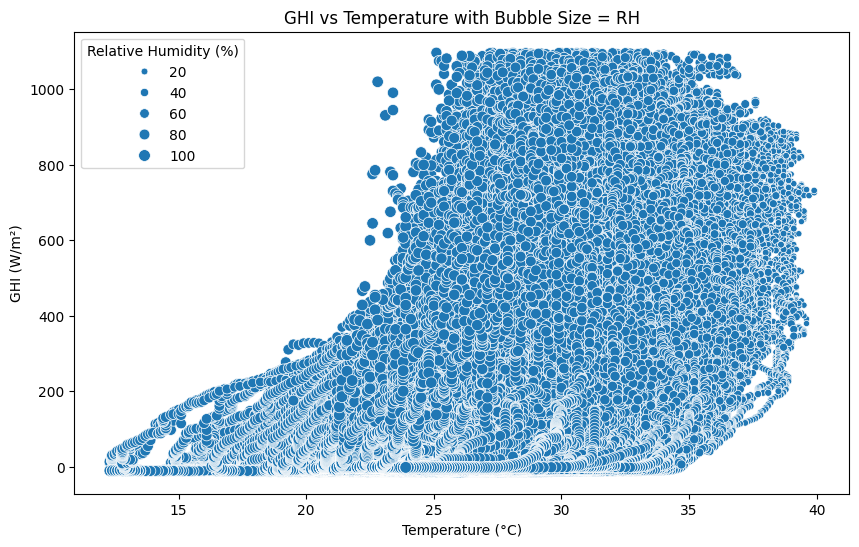

In [97]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df_clean,x = "Tamb",y = "GHI",size= "RH")
plt.xlabel("Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Temperature with Bubble Size = RH")
plt.legend(title = "Relative Humidity (%)")
plt.show()